<hr style="border:1px solid #FEC60D"> </hr>
<center><h1 style="color:#173F8A;"> FUNDAMENTOS MATEMATICOS PARA INTELIGENCIA ARTIFICIAL</h1></center> 
<center><h1 style="color:#173F8A;"> IMT 3850 </h1></center>
<hr style="border:1px solid #FEC60D"> </hr>
<center><h3 style="color:#0176DE;text-align:right;"> Profesor. Manuel A. Sanchez<br></h3></center>
<h3 style="color:#03122E;text-align:right;"> Magister en Ingenieria Artificial - MIA <br> Instituto de Ingenieria Matematica y Computacional - IMC<br>  Pontificia Universidad Catolica de Chile<br>   </h3>




<!-- Palette colors UC:
Primaria: 
celeste:#0176DE, azul #173F8A, azul oscuro: #03122E, amarillo: #FEC60D, amarillo oscuro: #E3AE00 
Secundaria
gris oscuro: #707070
-->



<hr style="border:2px solid #03122E"> </hr>
<center><h1 style="color:#173F8A;"> Probabilidades y Estadisticas para IA</h1></center> 
<hr style="border:2px solid #03122E"> </hr>

**Tabla de contenidos**
1. [Ejemplo: Quicksort](#Ejemplo:-Quicksort)
2. [Ejemplo: Bivariate normal](#Ejemplo:-Bivariate-normal)
3. [Ejemplo: reduccion dimensionalidad](#Ejemplo:-reduccion-dimensionalidad)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors
from IPython.display import display, HTML
display(HTML("""<style>.output {display: flex;align-items: center;text-align: center;}</style>"""))

In [63]:
from scipy.special import gamma
n=10
np.pi**(n/2)/(2**n*gamma(n/2+1))

np.float64(0.00249039457019272)

## Ejemplo: Teorema de Bayes

In [59]:
from sklearn.datasets import load_wine
# Los datos son un analisis quimico de vinos en una region de Otalia para 3 diferences agricolas
# Hay 13 mediciones diferentes tomadas de 3 tipos de vinos 
data = load_wine()
x,y,column_names = data['data'], data['target'], data['feature_names']
# x : datos
# y: etiquetas de los vinos
# print("x:", x)
# print("y:", y)
print(column_names)

['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']


In [31]:
x = pd.DataFrame(x, columns=column_names)

In [32]:
from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(x,y,test_size=0.33, random_state=44)

In [33]:
print("numero de datos vs numero de medidas totales:", x.shape)
print("numero de datos vs numero de medidas entrenamiento:", x_train.shape)
print("numero de datos vs numero de medidas test:", x_val.shape)


numero de datos vs numero de medidas totales: (178, 13)
numero de datos vs numero de medidas entrenamiento: (119, 13)
numero de datos vs numero de medidas test: (59, 13)


### Naive Bayes classifier 

In [39]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
clf = GaussianNB()
clf.fit(x_train, y_train)
y_pred = clf.predict(x_val)
accuracy = accuracy_score(y_val, y_pred)
print("Precision del clasificador: ", accuracy)
print(x_train)

Precision del clasificador:  0.9491525423728814
     alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
167    12.82        3.37  2.30               19.5       88.0           1.48   
148    13.32        3.24  2.38               21.5       92.0           1.93   
105    12.42        2.55  2.27               22.0       90.0           1.68   
27     13.30        1.72  2.14               17.0       94.0           2.40   
41     13.41        3.84  2.12               18.8       90.0           2.45   
..       ...         ...   ...                ...        ...            ...   
131    12.88        2.99  2.40               20.0      104.0           1.30   
59     12.37        0.94  1.36               10.6       88.0           1.98   
173    13.71        5.65  2.45               20.5       95.0           1.68   
163    12.96        3.45  2.35               18.5      106.0           1.39   
20     14.06        1.63  2.28               16.0      126.0           3.00   

   

### lo construimos nosotros mismos

Primero calculamos la media y desviacion estandar de cada atributo por cada clase. Tambien calculamos la probabilidad a priori de cada clase . Todo esto con el conjunto de entrenamiento.

In [41]:
means = x_train.groupby(y_train).mean()
# print("means:\n", means)
print("mean del vino 1:", means.iloc[0])
print("mean del vino 2:", means.iloc[1])
print("mean del vino 3:", means.iloc[2])
stds = x_train.groupby(y_train).apply(np.std)

probs = x_train.groupby(y_train).apply(lambda x: len(x)/len(x_train))
print(probs)

mean del vino 1: alcohol                           13.738421
malic_acid                         1.978158
ash                                2.441053
alcalinity_of_ash                 16.736842
magnesium                        107.631579
total_phenols                      2.843421
flavanoids                         3.009211
nonflavanoid_phenols               0.283684
proanthocyanins                    1.926842
color_intensity                    5.577632
hue                                1.070000
od280/od315_of_diluted_wines       3.140000
proline                         1112.815789
Name: 0, dtype: float64
mean del vino 2: alcohol                          12.227872
malic_acid                        2.018085
ash                               2.206383
alcalinity_of_ash                19.897872
magnesium                        94.510638
total_phenols                     2.227660
flavanoids                        2.062553
nonflavanoid_phenols              0.359149
proanthocyanins           

C:\Users\Manuel Sánchez\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\_core\fromnumeric.py:4109: FutureWarning: The behavior of DataFrame.std with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


Esto quiere decir que
$$ P(\text{clase vino }1) = 0.319, \quad P(\text{clase vino }2) = 0.394, \quad P(\text{clase vino }3) = 0.285
$$

ahora necesitamos las probabilidades Bayesianas. Para cada elemento calcularemos la probabilidad que pertenezca a cada clase. Observe que 

Para cada clase c, para cada atributo (param) se calcula la probabilidad de observar ese atributo dado la clase $P(param|c)$. Se asume distribucion normal. 

Se multiplican las probabilidades conjuntas asumiendo (inocentemente) independencia entre los atributos.

Finalmente $p[c]$ es la probabilidad que el dato pertenezca a la clase $c$. 

In [46]:
from scipy.stats import norm
y_pred_new = []

for elem in range(x_val.shape[0]):
    p = {}
    for c in np.unique(y_train):
        # print("c:", c)
        p[c] = probs.iloc[c]
        for index, param in enumerate(x_val.iloc[elem]):
            # print("index:", index, "columna:", column_names[index])
            # print("param:", param)
            # print(means.iloc[c, index])
            p[c] *= norm.pdf(param, means.iloc[c, index], stds.iloc[c, index])
    y_pred_new.append(pd.Series(p).values.argmax())

index: 2 columna: ash
param: 2.26
index: 3 columna: alcalinity_of_ash
param: 22.5
index: 4 columna: magnesium
param: 88.0
index: 5 columna: total_phenols
param: 1.28
index: 6 columna: flavanoids
param: 0.47
index: 7 columna: nonflavanoid_phenols
param: 0.52
index: 8 columna: proanthocyanins
param: 1.15
index: 9 columna: color_intensity
param: 6.62
index: 10 columna: hue
param: 0.78
index: 11 columna: od280/od315_of_diluted_wines
param: 1.75
index: 12 columna: proline
param: 520.0
c: 2
index: 0 columna: alcohol
param: 13.73
index: 1 columna: malic_acid
param: 4.36
index: 2 columna: ash
param: 2.26
index: 3 columna: alcalinity_of_ash
param: 22.5
index: 4 columna: magnesium
param: 88.0
index: 5 columna: total_phenols
param: 1.28
index: 6 columna: flavanoids
param: 0.47
index: 7 columna: nonflavanoid_phenols
param: 0.52
index: 8 columna: proanthocyanins
param: 1.15
index: 9 columna: color_intensity
param: 6.62
index: 10 columna: hue
param: 0.78
index: 11 columna: od280/od315_of_diluted_win

In [47]:
accuracy = accuracy_score(y_val, y_pred_new)
print("Precision del clasificador: ", accuracy)

Precision del clasificador:  0.9491525423728814


In [12]:
help(norm.pdf)

Help on method pdf in module scipy.stats._distn_infrastructure:

pdf(x, *args, **kwds) method of scipy.stats._continuous_distns.norm_gen instance
    Probability density function at x of the given RV.
    
    Parameters
    ----------
    x : array_like
        quantiles
    arg1, arg2, arg3,... : array_like
        The shape parameter(s) for the distribution (see docstring of the
        instance object for more information)
    loc : array_like, optional
        location parameter (default=0)
    scale : array_like, optional
        scale parameter (default=1)
    
    Returns
    -------
    pdf : ndarray
        Probability density function evaluated at x



## Ejemplo: Quicksort

In [18]:
def Quicksort(Sinput):
    S = Sinput.copy()
    if len(S) == 1 or not S:
        return S
    else:
        # choose pivot
        ix = np.random.choice(range(0, len(S)))
        x = S[ix]
        S1 = []
        S2 = []
        S.remove(x)
        for item in S:
            if item<x:
                S1.append(item)
            else:
                S2.append(item)
        S1 = Quicksort(S1)
        S2 = Quicksort(S2)
        
        return S1+[x]+S2

In [17]:
# Ejemplo Lista numeros aleatorios
S = np.random.rand(6).tolist()
print(S)
S_sorted = Quicksort(S)
print(S_sorted)

[0.3150987948341961, 0.6793548866935788, 0.5101340617761844, 0.013169274333232006, 0.9621080048987456, 0.5581183085966727]
[0.013169274333232006, 0.3150987948341961, 0.5101340617761844, 0.5581183085966727, 0.6793548866935788, 0.9621080048987456]


In [19]:
def Quicksort_count_comparison(Sinput):
    S = Sinput.copy()
    if len(S) == 1 or not S:
        return S, 0
    else:
        # choose pivot
        ix = np.random.choice(range(0, len(S)))
        x = S[ix]
        S1 = []
        S2 = []
        S.remove(x)
        for item in S:
            if item<x:
                S1.append(item)
            else:
                S2.append(item)
        count = len(S)
        S1, count1 = Quicksort_count_comparison(S1)
        S2, count2 = Quicksort_count_comparison(S2)
        count += count1+count2
        return S1+[x]+S2, count

In [22]:
# Ejemplo lista aleatoria y contar
S = np.random.rand(6).tolist()
S_sorted, count_comparisons = Quicksort_count_comparison(S)
print(S)
print(S_sorted)
print(count_comparisons)

[0.6960099480357363, 0.8094923229076376, 0.12761407086216325, 0.7266362143898724, 0.04705665579170559, 0.5733430235748227]
[0.04705665579170559, 0.12761407086216325, 0.5733430235748227, 0.6960099480357363, 0.7266362143898724, 0.8094923229076376]
9


In [23]:
n = [30,40,50,60,70,80,90,100,110,120,130,140,150,160,170,180,190,200]
cc = []
N = 100
for ni in n:
    cc_i =0
    for j in range(N):
        S = np.random.rand(ni).tolist()
        Ssorted, count_comparisons_j = Quicksort_count_comparison(S)
        cc_i += count_comparisons_j
    cc.append(cc_i/N)

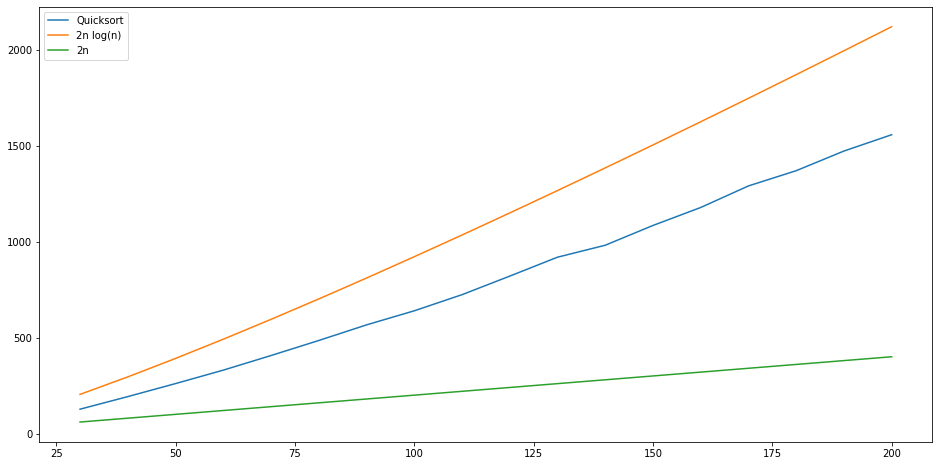

In [24]:
plt.plot(n, cc, label='Quicksort')
plt.plot(n, 2*np.asarray(n)*np.log(np.asarray(n)), 'C01', label='2n log(n)')
plt.plot(n, 2*np.asarray(n), 'C02', label='2n')
plt.legend()
plt.show()

## Ejemplo: Randomized median algorithm

In [25]:
def RandomizedMedianAlgorithm(Sinput):
    S = Sinput.copy()
    n = len(S)
    n34 = n**(3/4)
    n12 = np.sqrt(n)
    print(n, n34, n12)
    n1 = int(np.ceil(n34))

    R = sample(S, n1)
    print("len(R):", len(R))
    R = Quicksort(R)
    #print(R)
    di = int(np.floor(0.5*n34-n12))
    ui = int(np.ceil(0.5*n34+n12)-1)
    print("di:", di, "ui:", ui)
    d = R[di]
    u = R[ui]
    print("d:", d, "u:",u)
    C = []
    elld = 0
    ellu = 0
    for x in S:
        if x<d:
            elld += 1
        elif x>u:
            ellu += 1
        else:
            C.append(x)
    print("elld:", elld)
    print("ellu:", ellu)
    print("|C|: ", len(C), 4*n34)
    if elld>n/2 or ellu>n/2:
        return False
    if len(C) <= 4*n34:
        C = Quicksort(C)
        m = int(np.floor(n/2)) - elld   # or -1 in python
        return C[m]
    else:
        return False

In [26]:
from random import sample
NS = 21
S = np.random.rand(NS).tolist()

print(len(S))
Ssorted = Quicksort(S)
print(Ssorted[int((NS-1)/2)])
#S = [0,2,5,1,4,7,9,6,8,11,15,13,12,14, 18, 19,20, 16, 17]

21
0.4124071733349989


In [30]:
answer = True
iter = 0
NS = 201
#S = np.random.rand(NS).tolist()
S = np.arange(NS).tolist()
while answer is not False and iter<1000:
    
    
    answer = RandomizedMedianAlgorithm(S)
    print("*** iter:", iter, ", answer:", answer)
    iter += 1

201 53.382270676979665 14.177446878757825
len(R): 54
di: 12 ui: 40
d: 41 u: 150
elld: 41
ellu: 50
|C|:  110 213.52908270791866
*** iter: 0 , answer: 100
201 53.382270676979665 14.177446878757825
len(R): 54
di: 12 ui: 40
d: 38 u: 158
elld: 38
ellu: 42
|C|:  121 213.52908270791866
*** iter: 1 , answer: 100
201 53.382270676979665 14.177446878757825
len(R): 54
di: 12 ui: 40
d: 61 u: 150
elld: 61
ellu: 50
|C|:  90 213.52908270791866
*** iter: 2 , answer: 100
201 53.382270676979665 14.177446878757825
len(R): 54
di: 12 ui: 40
d: 43 u: 160
elld: 43
ellu: 40
|C|:  118 213.52908270791866
*** iter: 3 , answer: 100
201 53.382270676979665 14.177446878757825
len(R): 54
di: 12 ui: 40
d: 52 u: 154
elld: 52
ellu: 46
|C|:  103 213.52908270791866
*** iter: 4 , answer: 100
201 53.382270676979665 14.177446878757825
len(R): 54
di: 12 ui: 40
d: 42 u: 148
elld: 42
ellu: 52
|C|:  107 213.52908270791866
*** iter: 5 , answer: 100
201 53.382270676979665 14.177446878757825
len(R): 54
di: 12 ui: 40
d: 41 u: 149
ell

*** iter: 260 , answer: 100
201 53.382270676979665 14.177446878757825
len(R): 54
di: 12 ui: 40
d: 31 u: 157
elld: 31
ellu: 43
|C|:  127 213.52908270791866
*** iter: 261 , answer: 100
201 53.382270676979665 14.177446878757825
len(R): 54
di: 12 ui: 40
d: 48 u: 146
elld: 48
ellu: 54
|C|:  99 213.52908270791866
*** iter: 262 , answer: 100
201 53.382270676979665 14.177446878757825
len(R): 54
di: 12 ui: 40
d: 48 u: 165
elld: 48
ellu: 35
|C|:  118 213.52908270791866
*** iter: 263 , answer: 100
201 53.382270676979665 14.177446878757825
len(R): 54
di: 12 ui: 40
d: 43 u: 150
elld: 43
ellu: 50
|C|:  108 213.52908270791866
*** iter: 264 , answer: 100
201 53.382270676979665 14.177446878757825
len(R): 54
di: 12 ui: 40
d: 47 u: 152
elld: 47
ellu: 48
|C|:  106 213.52908270791866
*** iter: 265 , answer: 100
201 53.382270676979665 14.177446878757825
len(R): 54
di: 12 ui: 40
d: 51 u: 149
elld: 51
ellu: 51
|C|:  99 213.52908270791866
*** iter: 266 , answer: 100
201 53.382270676979665 14.177446878757825
le

*** iter: 422 , answer: 100
201 53.382270676979665 14.177446878757825
len(R): 54
di: 12 ui: 40
d: 27 u: 138
elld: 27
ellu: 62
|C|:  112 213.52908270791866
*** iter: 423 , answer: 100
201 53.382270676979665 14.177446878757825
len(R): 54
di: 12 ui: 40
d: 38 u: 117
elld: 38
ellu: 83
|C|:  80 213.52908270791866
*** iter: 424 , answer: 100
201 53.382270676979665 14.177446878757825
len(R): 54
di: 12 ui: 40
d: 44 u: 151
elld: 44
ellu: 49
|C|:  108 213.52908270791866
*** iter: 425 , answer: 100
201 53.382270676979665 14.177446878757825
len(R): 54
di: 12 ui: 40
d: 38 u: 142
elld: 38
ellu: 58
|C|:  105 213.52908270791866
*** iter: 426 , answer: 100
201 53.382270676979665 14.177446878757825
len(R): 54
di: 12 ui: 40
d: 53 u: 139
elld: 53
ellu: 61
|C|:  87 213.52908270791866
*** iter: 427 , answer: 100
201 53.382270676979665 14.177446878757825
len(R): 54
di: 12 ui: 40
d: 46 u: 149
elld: 46
ellu: 51
|C|:  104 213.52908270791866
*** iter: 428 , answer: 100
201 53.382270676979665 14.177446878757825
le

*** iter: 558 , answer: 100
201 53.382270676979665 14.177446878757825
len(R): 54
di: 12 ui: 40
d: 35 u: 136
elld: 35
ellu: 64
|C|:  102 213.52908270791866
*** iter: 559 , answer: 100
201 53.382270676979665 14.177446878757825
len(R): 54
di: 12 ui: 40
d: 50 u: 171
elld: 50
ellu: 29
|C|:  122 213.52908270791866
*** iter: 560 , answer: 100
201 53.382270676979665 14.177446878757825
len(R): 54
di: 12 ui: 40
d: 50 u: 148
elld: 50
ellu: 52
|C|:  99 213.52908270791866
*** iter: 561 , answer: 100
201 53.382270676979665 14.177446878757825
len(R): 54
di: 12 ui: 40
d: 40 u: 152
elld: 40
ellu: 48
|C|:  113 213.52908270791866
*** iter: 562 , answer: 100
201 53.382270676979665 14.177446878757825
len(R): 54
di: 12 ui: 40
d: 35 u: 155
elld: 35
ellu: 45
|C|:  121 213.52908270791866
*** iter: 563 , answer: 100
201 53.382270676979665 14.177446878757825
len(R): 54
di: 12 ui: 40
d: 39 u: 150
elld: 39
ellu: 50
|C|:  112 213.52908270791866
*** iter: 564 , answer: 100
201 53.382270676979665 14.177446878757825
l

di: 12 ui: 40
d: 39 u: 139
elld: 39
ellu: 61
|C|:  101 213.52908270791866
*** iter: 799 , answer: 100
201 53.382270676979665 14.177446878757825
len(R): 54
di: 12 ui: 40
d: 59 u: 169
elld: 59
ellu: 31
|C|:  111 213.52908270791866
*** iter: 800 , answer: 100
201 53.382270676979665 14.177446878757825
len(R): 54
di: 12 ui: 40
d: 44 u: 138
elld: 44
ellu: 62
|C|:  95 213.52908270791866
*** iter: 801 , answer: 100
201 53.382270676979665 14.177446878757825
len(R): 54
di: 12 ui: 40
d: 44 u: 154
elld: 44
ellu: 46
|C|:  111 213.52908270791866
*** iter: 802 , answer: 100
201 53.382270676979665 14.177446878757825
len(R): 54
di: 12 ui: 40
d: 53 u: 159
elld: 53
ellu: 41
|C|:  107 213.52908270791866
*** iter: 803 , answer: 100
201 53.382270676979665 14.177446878757825
len(R): 54
di: 12 ui: 40
d: 38 u: 160
elld: 38
ellu: 40
|C|:  123 213.52908270791866
*** iter: 804 , answer: 100
201 53.382270676979665 14.177446878757825
len(R): 54
di: 12 ui: 40
d: 49 u: 151
elld: 49
ellu: 49
|C|:  103 213.529082707918

*** iter: 926 , answer: 100
201 53.382270676979665 14.177446878757825
len(R): 54
di: 12 ui: 40
d: 33 u: 143
elld: 33
ellu: 57
|C|:  111 213.52908270791866
*** iter: 927 , answer: 100
201 53.382270676979665 14.177446878757825
len(R): 54
di: 12 ui: 40
d: 54 u: 143
elld: 54
ellu: 57
|C|:  90 213.52908270791866
*** iter: 928 , answer: 100
201 53.382270676979665 14.177446878757825
len(R): 54
di: 12 ui: 40
d: 51 u: 138
elld: 51
ellu: 62
|C|:  88 213.52908270791866
*** iter: 929 , answer: 100
201 53.382270676979665 14.177446878757825
len(R): 54
di: 12 ui: 40
d: 52 u: 136
elld: 52
ellu: 64
|C|:  85 213.52908270791866
*** iter: 930 , answer: 100
201 53.382270676979665 14.177446878757825
len(R): 54
di: 12 ui: 40
d: 49 u: 148
elld: 49
ellu: 52
|C|:  100 213.52908270791866
*** iter: 931 , answer: 100
201 53.382270676979665 14.177446878757825
len(R): 54
di: 12 ui: 40
d: 58 u: 153
elld: 58
ellu: 47
|C|:  96 213.52908270791866
*** iter: 932 , answer: 100
201 53.382270676979665 14.177446878757825
len(

## Ejemplo: Binomial a Normal, una ilustracion del teorema del limite central.

In [48]:
import scipy.special as spsp
import matplotlib.pyplot as plt
import numpy as np

(0.0, 10.0)

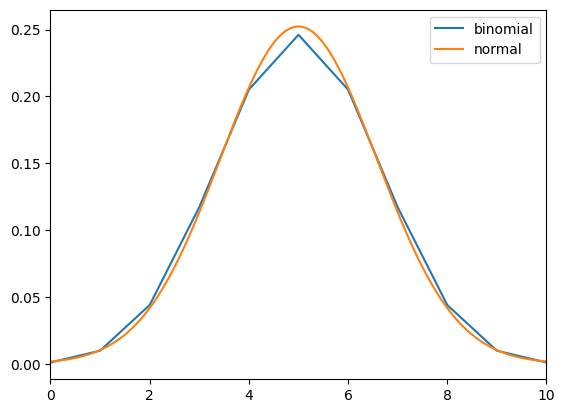

In [53]:
n =10 # try 50, 20 ,10
p = 0.5
q = 1-p

# Binomial
PXbinomial = []
for k in range(n+1):
    probX = spsp.comb(n,k)* p**k * q**(n-k)
    PXbinomial.append(probX)

# Normal
mu = n*p
sigma = np.sqrt(n*p*q)

X = np.arange(0,n,0.01)
PXnormal = (1/(sigma*np.sqrt(2*np.pi))*np.exp(-(X-mu)**2/(2*sigma**2)))

# plot
plt.plot(PXbinomial, label = "binomial")
plt.plot(X, PXnormal, label = "normal")
plt.legend()
plt.xlim(0,n)

### caso limite, np pequeno

para caso de p pequenos, se observa que la normal tiene un comportamiento no fisico al tener area al lado izquierdo de 0.

Para estos casos necesitaremos Poisson.

(-10.0, 20.0)

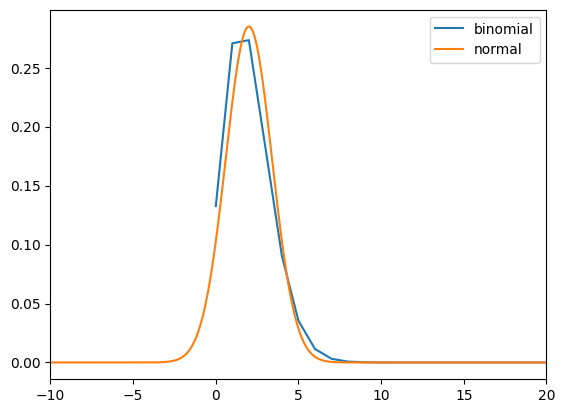

In [57]:
n =100
p = 0.02
q = 1-p

# Binomial
PXbinomial = []
for k in range(n+1):
    probX = spsp.comb(n,k)* p**k * q**(n-k)
    PXbinomial.append(probX)

# Normal
mu = n*p
sigma = np.sqrt(n*p*q)

X = np.arange(-30,n,0.01)
PXnormal = (1/(sigma*np.sqrt(2*np.pi))*np.exp(-(X-mu)**2/(2*sigma**2)))

# plot
plt.plot(PXbinomial, label = "binomial")
plt.plot(X, PXnormal, label = "normal")
plt.legend()
plt.xlim(-10,20)

## Binomial a Poisson para $np$ pequeno

(0.0, 50.0)

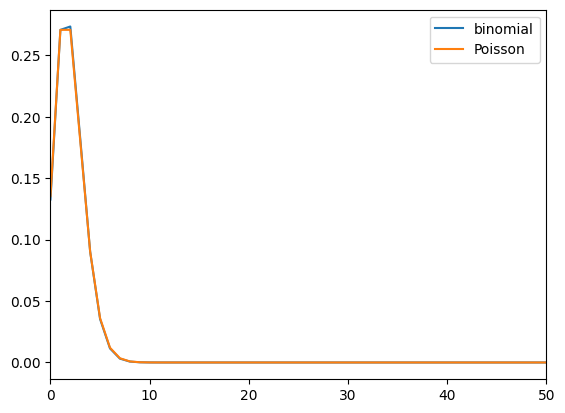

In [58]:
n =100
p = 0.02
q = 1-p

# Binomial
PXbinomial = []
for k in range(n+1):
    probX = spsp.comb(n,k)* p**k * q**(n-k)
    PXbinomial.append(probX)

# Poisson
lamb = n*p
PXpoisson =[]
for k in range(n+1):
    probX = lamb**k/spsp.factorial(k)* np.exp(-lamb)
    PXpoisson.append(probX)

# plot
plt.plot(PXbinomial, label = "binomial")
plt.plot(PXpoisson, label = "Poisson")
plt.legend()
plt.xlim(0,50)

## Ejemplo: Bivariate normal

In [7]:
import numpy as np
from scipy.stats import multivariate_normal

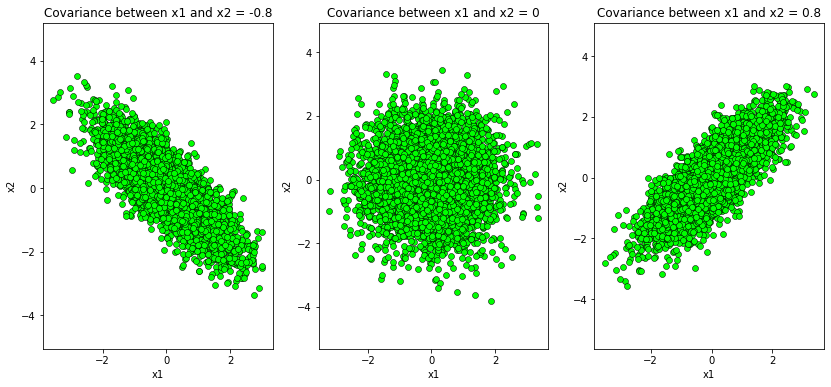

In [10]:
# Ilustracion de la covarianza entre dos variables

plt.rcParams['figure.figsize']=14,6
# Initializing the random seed
random_seed=1000
 
# List containing the variance
# covariance values
cov_val = [-0.8, 0, 0.8]
 
# Setting mean of the distributino to
# be at (0,0)
mean = np.array([0,0])
 
# Iterating over different covariance
# values
for idx, val in enumerate(cov_val):
    plt.subplot(1,3,idx+1)
     
    # Initializing the covariance matrix
    cov = np.array([[1, val], [val, 1]])
     
    # Generating a Gaussian bivariate distribution
    # with given mean and covariance matrix
    distr = multivariate_normal(cov = cov, mean = mean,
                                seed = random_seed)
     
    # Generating 5000 samples out of the
    # distribution
    data = distr.rvs(size = 5000)
     
    # Plotting the generated samples
    plt.plot(data[:,0],data[:,1], 'o', c='lime',
             markeredgewidth = 0.5,
             markeredgecolor = 'black')
    plt.title(f'Covariance between x1 and x2 = {val}')
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.axis('equal')
     
plt.show()

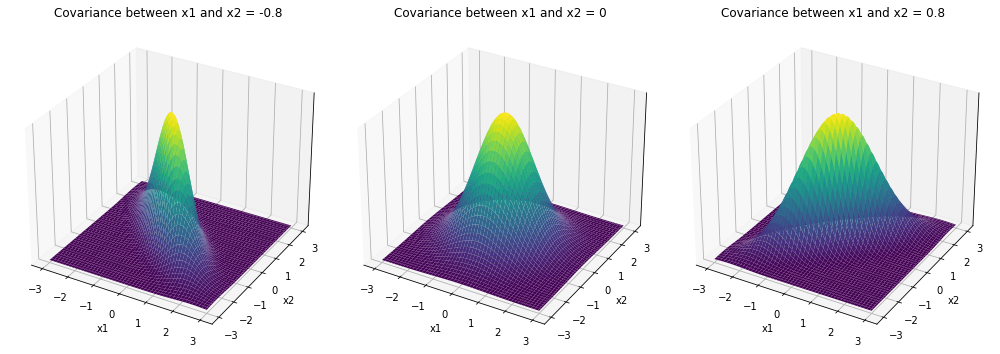

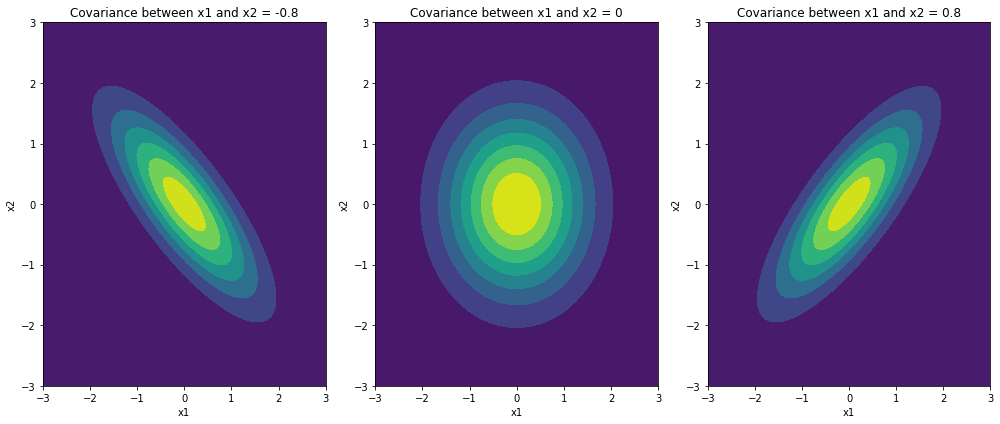

In [11]:
plt.rcParams['figure.figsize']=14,6
fig = plt.figure()
 
# Initializing the random seed
random_seed=1000
 
# List containing the variance
# covariance values
cov_val = [-0.8, 0, 0.8]
 
# Setting mean of the distributino
# to be at (0,0)
mean = np.array([0,0])
 
# Storing density function values for
# further analysis
pdf_list = []
 
# Iterating over different covariance values
for idx, val in enumerate(cov_val):
     
    # Initializing the covariance matrix
    cov = np.array([[1, val], [val, 1]])
     
    # Generating a Gaussian bivariate distribution
    # with given mean and covariance matrix
    distr = multivariate_normal(cov = cov, mean = mean,
                                seed = random_seed)
     
    # Generating a meshgrid complacent with
    # the 3-sigma boundary
    mean_1, mean_2 = mean[0], mean[1]
    sigma_1, sigma_2 = cov[0,0], cov[1,1]
     
    x = np.linspace(-3*sigma_1, 3*sigma_1, num=100)
    y = np.linspace(-3*sigma_2, 3*sigma_2, num=100)
    X, Y = np.meshgrid(x,y)
     
    # Generating the density function
    # for each point in the meshgrid
    pdf = np.zeros(X.shape)
    for i in range(X.shape[0]):
        for j in range(X.shape[1]):
            pdf[i,j] = distr.pdf([X[i,j], Y[i,j]])
     
    # Plotting the density function values
    key = 131+idx
    ax = fig.add_subplot(key, projection = '3d')
    ax.plot_surface(X, Y, pdf, cmap = 'viridis')
    plt.xlabel("x1")
    plt.ylabel("x2")
    plt.title(f'Covariance between x1 and x2 = {val}')
    pdf_list.append(pdf)
    ax.axes.zaxis.set_ticks([])
 
plt.tight_layout()
plt.show()
 
# Plotting contour plots
for idx, val in enumerate(pdf_list):
    plt.subplot(1,3,idx+1)
    plt.contourf(X, Y, val, cmap='viridis')
    plt.xlabel("x1")
    plt.ylabel("x2")
    plt.title(f'Covariance between x1 and x2 = {cov_val[idx]}')
plt.tight_layout()
plt.show()

## Ejemplo: reduccion dimensionalidad

El proposito de de alguna forma reducir las dimensiones de las columnas de la matriz de datos $X$ a solo columnas que tienen una importancia para la tarea de aprendizaje de maquina. El analisos de componente principal (PCA) consiste en tmar la matrix $X$ como input y:
1. substraer su media, 
2. calcular la matriz de covarianza,
3. calcular la descomposicion de valores propios de la matriz de covarianza.


In [2]:
from sklearn import decomposition
import numpy as np
pca = decomposition.PCA()

*** Resultados de PCA:
Percentage of variance explained by each of the selected components:
 [1.00000000e+00 4.44789028e-32 6.56191018e-33]
sin vals  [5.66294672e+00 1.19431671e-15 4.58730500e-16]
*** Resultados de SVD:
Sig: [5.66294672e+00 1.19431671e-15 4.58730500e-16]
Sig^2: [3.20689655e+01 1.42639240e-30 2.10433671e-31]
*** Resultados de EIG:
Sig^2: [ 3.20689655e+01  3.96491872e-15 -2.18856188e-15]


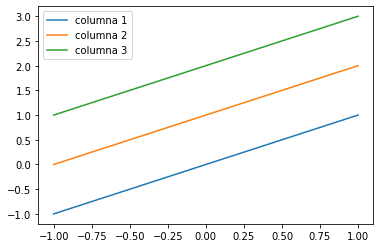

In [3]:
# Create data
N = 30
x = np.linspace(-1,1,N)
X = np.c_[x,x+1,x+2] 
pca.fit(X)

print('*** Resultados de PCA:')
print("Percentage of variance explained by each of the selected components:\n", pca.explained_variance_ratio_)
print("sin vals ", pca.singular_values_)
Xavg = np.mean(X, axis=0)

# 1. sustraer media
B = X - np.tile(Xavg,(N,1))

# 2. Calcular matriz de Covarianza muestreada
S = B.T.dot(B)
U, Sig, VT = np.linalg.svd(B, full_matrices = 0)
print('*** Resultados de SVD:')
print("Sig:", Sig)
print("Sig^2:", Sig*Sig)
# 3. 
lamb, v = np.linalg.eigh(S)
print('*** Resultados de EIG:')
print("Sig^2:", np.flip(lamb))
plt.rcParams['figure.figsize']=8,6
plt.plot(x,X[:,0],label='columna 1')
plt.plot(x,X[:,1],label='columna 2')
plt.plot(x,X[:,2],label='columna 3')
plt.legend()
plt.show()

In [26]:
# segundo ejemplo
X = np.c_[x, 2*x+1, 3*x+2, 4*x]
pca.fit(X)
print(pca.explained_variance_ratio_)
print("sin vals ", pca.singular_values_)

[1.00000000e+00 3.06655395e-32 1.27799345e-33 2.19916511e-34]
sin vals  [1.79078099e+01 3.13594025e-15 6.40186910e-16 2.65565341e-16]


In [28]:
# tercer ejemplo
X = np.c_[np.sin(2*np.pi*x), 2*np.sin(2*np.pi*x)+1, 3*np.sin(2*np.pi*x)+2]
pca.fit(X)
print(pca.explained_variance_ratio_)
print("sin vals ", pca.singular_values_)

[1.00000000e+00 4.22855533e-32 5.59334004e-33]
sin vals  [1.42478068e+01 2.92984084e-15 1.06557404e-15]


## Ejemplo: toy problem

Revisitado

(2, 10000)
*** Resultados de SVD:
S: [1.99615804 0.49205176] varianza en cada una de las direcciones
*** Resultados de EIG:
Valores singulares: [0.49205176 1.99615804]
Eigenvalues: [0.24211493 3.98464693]


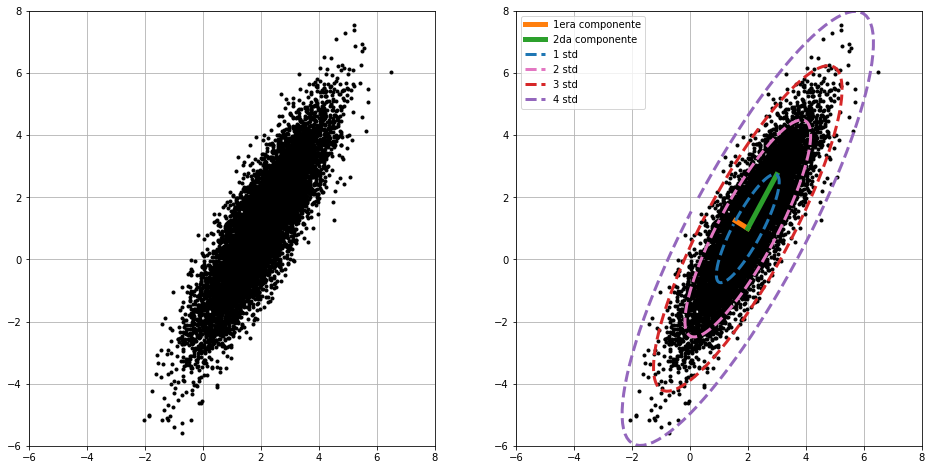

In [17]:
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['figure.figsize'] = [16,8]

xC = np.array([2.0,1.0]) # Este es el centro de nuestros datos o el promedio
sig = np.array([2.0,0.5]) # ejes principales



# Rotacion en angulo theta
theta = np.pi/3.0
c = np.cos(theta); s = np.sin(theta)
R = np.array([[c,-s],[s,c]])

nPoints = 10000

X = R @ np.diag(sig) @ np.random.randn(2,nPoints) + np.diag(xC) @ np.ones((2,nPoints))
print(X.shape)
# stretch los puntos, los rotamos en el angulo theta y los centramos en xC

fig = plt.figure()
ax1 = fig.add_subplot(121)
ax1.plot(X[0,:], X[1,:], '.', color = 'k')
ax1.grid()
plt.xlim((-6,8))
plt.ylim((-6,8))



# 1. substraer media
Xavg = np.mean(X, axis=1)
B = X.T - np.tile(Xavg,(nPoints,1))

# 2. Calcular matriz de covarianza
SV =  B.T.dot(B)/(nPoints)
U, S, VT = np.linalg.svd((1.0/np.sqrt(nPoints))*B, full_matrices = 0)
print('*** Resultados de SVD:')
print('S:', S, 'varianza en cada una de las direcciones')
#print('u1:', U[:,0])
#print('u2:', U[:,1])

# 3. Calcular EIG
lamb, V = np.linalg.eigh(SV)

Sig =np.sqrt(lamb)
print('*** Resultados de EIG:')
print("Valores singulares:", Sig)
print("Eigenvalues:", lamb)

ax2 = fig.add_subplot(122)
ax2.plot(X[0,:],X[1,:], '.', color='k')   # Plot data to overlay PCA
ax2.grid()
plt.xlim((-6, 8))
plt.ylim((-6,8))

phi = 2 * np.pi * np.arange(0,1,0.01)

# Intervalos de confianza
# 1-std confidence interval
Xstd = V @ np.diag(Sig) @ np.array([np.cos(phi),np.sin(phi)])

# Plot principal components U[:,0]S[0] and U[:,1]S[1]
ax2.plot(np.array([Xavg[0], Xavg[0]+V[0,0]*Sig[0]]),
         np.array([Xavg[1], Xavg[1]+V[1,0]*Sig[0]]),'-',color='C01',linewidth=5, label='1era componente')
ax2.plot(np.array([Xavg[0], Xavg[0]+V[0,1]*Sig[1]]),
         np.array([Xavg[1], Xavg[1]+V[1,1]*Sig[1]]),'-',color='C02',linewidth=5, label='2da componente')

ax2.plot(Xavg[0] + 1*Xstd[0,:], Xavg[1] + 1*Xstd[1,:],'--',color='C0',  linewidth=3, label='1 std')
ax2.plot(Xavg[0] + 2*Xstd[0,:], Xavg[1] + 2*Xstd[1,:],'--',color='C06',linewidth=3, label='2 std')
ax2.plot(Xavg[0] + 3*Xstd[0,:], Xavg[1] + 3*Xstd[1,:],'--',color='C03',linewidth=3, label='3 std')
ax2.plot(Xavg[0] + 4*Xstd[0,:], Xavg[1] + 4*Xstd[1,:],'--',color='C04',linewidth=3, label='4 std')
ax2.legend()

plt.show()

## Ejemplo. Teorema del limite central

Sabemos que una variable aleatoria $X$ con distribucion Uniforme en (0, 1) nos da:
\begin{equation*}
\mu_X = \frac{1}{2}, \quad \sigma^2_X = \frac{1}{12}
\end{equation*}

El Teorema del limite central nos dice que  para la variable aleatoria $\overline{X}_n$

\begin{equation*}
\mu_{\overline{X}} = \frac{1}{2}, \quad \sigma^2_{\overline{X}} = \frac{1}{12n}
\end{equation*}

Nuestro objetivo es  comparar la distribucion normal, definida en el TLC, a la distribucion de $\overline{X}_n$. 

La estratefia de nuestro experimento es la siguiente

1. Especificar el tamano de muestras $n$.
2. Generar aleatoriamente 1000 muestas de tamano $n$ con distribucion uniforme (0,1).
3. Use las 1000 muestras para calcular 1000 los promedios de la distribucion Uniforme (0,1).
4. Cree un histograma de los 1000 promedios de muestras.
5. Compara el histograma con la distribucion normal

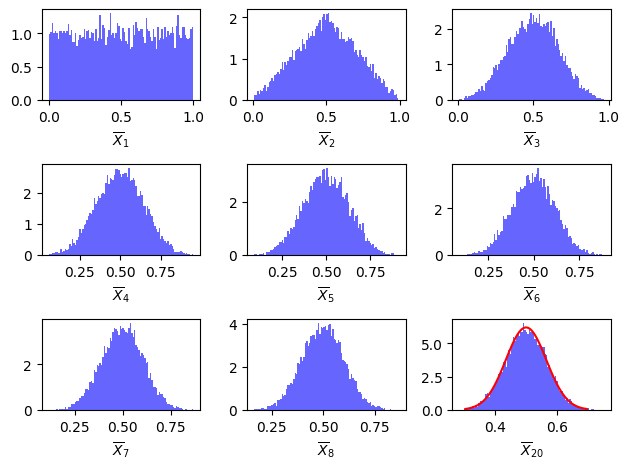

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Number of samples
num_samples = 10000

nbins=100

# Generate samples from uniform distribution
X1 = np.random.uniform(0, 1, num_samples)
plt.subplot(3, 3, 1)
plt.hist(X1, bins=nbins, density=True, alpha=0.6, color='b')
plt.xlabel(r'$\overline{X}_1$')

X2 = np.random.uniform(0, 1, num_samples)
X2bar = (X1+X2)/2
plt.subplot(3, 3, 2)
plt.hist(X2bar, bins=nbins, density=True, alpha=0.6, color='b')
plt.xlabel(r'$\overline{X}_2$')
# plt.ylabel('Density')
    
X3 = np.random.uniform(0, 1, num_samples)
X3bar = (X1+X2+X3)/3
plt.subplot(3, 3, 3)
plt.hist(X3bar, bins=nbins, density=True, alpha=0.6, color='b')
plt.xlabel(r'$\overline{X}_3$')

X4 = np.random.uniform(0, 1, num_samples)
X4bar = (X1+X2+X3+X4)/4
plt.subplot(3, 3, 4)
plt.hist(X4bar, bins=nbins, density=True, alpha=0.6, color='b')
plt.xlabel(r'$\overline{X}_4$')

X5 = np.random.uniform(0, 1, num_samples)
X5bar = (X1+X2+X3+X4+X5)/5
plt.subplot(3, 3, 5)
plt.hist(X5bar, bins=nbins, density=True, alpha=0.6, color='b')
plt.xlabel(r'$\overline{X}_5$')
# plt.ylabel('Density')
    
X6 = np.random.uniform(0, 1, num_samples)
X6bar = (X1+X2+X3+X4+X5+X6)/6
plt.subplot(3, 3, 6)
plt.hist(X6bar, bins=nbins, density=True, alpha=0.6, color='b')
plt.xlabel(r'$\overline{X}_6$')

X7 = np.random.uniform(0, 1, num_samples)
X7bar = (X1+X2+X3+X4+X5+X6+X7)/7
plt.subplot(3, 3, 7)
plt.hist(X7bar, bins=nbins, density=True, alpha=0.6, color='b')
plt.xlabel(r'$\overline{X}_7$')

X8 = np.random.uniform(0, 1, num_samples)
X8bar = (X1+X2+X3+X4+X5+X6+X7+X8)/8
plt.subplot(3, 3, 8)
plt.hist(X8bar, bins=nbins, density=True, alpha=0.6, color='b')
plt.xlabel(r'$\overline{X}_8$')

n = 20
Xn = np.random.uniform(0, 1, (n, num_samples))
Xnbar = np.mean(Xn, axis=0)
plt.subplot(3, 3, 9)
plt.hist(Xnbar, bins=nbins, density=True, alpha=0.6, color='b')
plt.xlabel(r'$\overline{X}_{20}$')


# Overlay theoretical normal distribution
mu = 0.5 #np.mean(sample_means)
sigma = np.sqrt(1/(12*n)) #np.std(sample_means)
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.plot(x, 1/(sigma * np.sqrt(2 * np.pi)) * np.exp(-(x - mu)**2 / (2 * sigma**2)), color='r', label='Normal Distribution')
# plt.legend()

plt.tight_layout()

plt.savefig('uniformtonormal.png')
plt.show()

## Ejemplo. Teorema del limite central

Ahora si la variable aleatoria $X$ tiene distribucion exponencial Exp(1) en (0,1) nos da:
\begin{equation*}
\mu_X = 1, \quad \sigma^2_X = 1
\end{equation*}

El Teorema del limite central nos dice que  para la variable aleatoria $\overline{X}_n$

\begin{equation*}
\mu_{\overline{X}} = \frac{1}{2}, \quad \sigma^2_{\overline{X}} = \frac{1}{n}
\end{equation*}

Nuestro objetivo es  comparar la distribucion normal, definida en el TLC, a la distribucion de $\overline{X}_n$. 

La estratefia de nuestro experimento es la siguiente

1. Especificar el tamano de muestras $n$.
2. Generar aleatoriamente 1000 muestas de tamano $n$ con distribucion uniforme (0,1).
3. Use las 1000 muestras para calcular 1000 los promedios de la distribucion Uniforme (0,1).
4. Cree un histograma de los 1000 promedios de muestras.
5. Compara el histograma con la distribucion normal

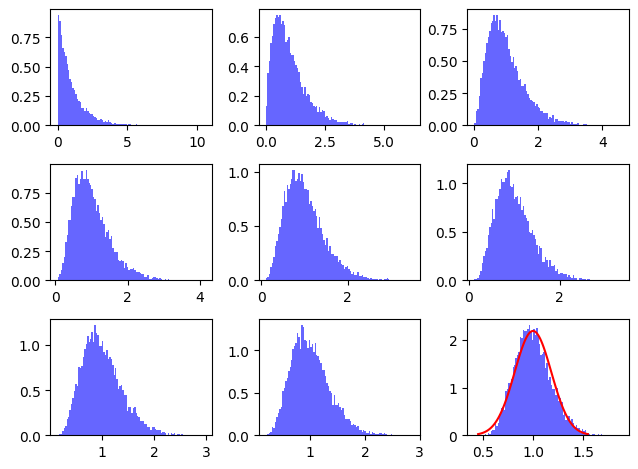

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Number of samples
num_samples = 10000

nbins=100

# Generate samples from uniform distribution
X1 = np.random.standard_exponential(num_samples)
plt.subplot(3, 3, 1)
plt.hist(X1, bins=nbins, density=True, alpha=0.6, color='b')
# plt.xlabel('Sample Mean')

X2 = np.random.standard_exponential(num_samples)
X2bar = (X1+X2)/2
plt.subplot(3, 3, 2)
plt.hist(X2bar, bins=nbins, density=True, alpha=0.6, color='b')
# plt.xlabel('Sample Mean')
# plt.ylabel('Density')
    
X3 = np.random.standard_exponential(num_samples)
X3bar = (X1+X2+X3)/3
plt.subplot(3, 3, 3)
plt.hist(X3bar, bins=nbins, density=True, alpha=0.6, color='b')
# plt.xlabel('Sample Mean')

X4 =np.random.standard_exponential(num_samples)
X4bar = (X1+X2+X3+X4)/4
plt.subplot(3, 3, 4)
plt.hist(X4bar, bins=nbins, density=True, alpha=0.6, color='b')
# plt.xlabel('Sample Mean')

X5 = np.random.standard_exponential(num_samples)
X5bar = (X1+X2+X3+X4+X5)/5
plt.subplot(3, 3, 5)
plt.hist(X5bar, bins=nbins, density=True, alpha=0.6, color='b')
# plt.xlabel('Sample Mean')
# plt.ylabel('Density')
    
X6 = np.random.standard_exponential(num_samples)
X6bar = (X1+X2+X3+X4+X5+X6)/6
plt.subplot(3, 3, 6)
plt.hist(X6bar, bins=nbins, density=True, alpha=0.6, color='b')
# plt.xlabel('Sample Mean')

X7 = np.random.standard_exponential(num_samples)
X7bar = (X1+X2+X3+X4+X5+X6+X7)/7
plt.subplot(3, 3, 7)
plt.hist(X7bar, bins=nbins, density=True, alpha=0.6, color='b')
# plt.xlabel('Sample Mean')

X8 = np.random.standard_exponential(num_samples)
X8bar = (X1+X2+X3+X4+X5+X6+X7+X8)/8
plt.subplot(3, 3, 8)
plt.hist(X8bar, bins=nbins, density=True, alpha=0.6, color='b')
# plt.xlabel('Sample Mean')

n = 30
Xn = np.random.standard_exponential((n,num_samples))
Xnbar = np.mean(Xn, axis=0)
plt.subplot(3, 3, 9)
plt.hist(Xnbar, bins=nbins, density=True, alpha=0.6, color='b')
# plt.xlabel('Sample Mean')


# Overlay theoretical normal distribution
mu = 1 #np.mean(sample_means)
sigma = np.sqrt(1/(n)) #np.std(sample_means)
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.plot(x, 1/(sigma * np.sqrt(2 * np.pi)) * np.exp(-(x - mu)**2 / (2 * sigma**2)), color='r', label='Normal Distribution')
# plt.legend()

plt.tight_layout()
plt.show()

